<a href="https://colab.research.google.com/github/pachterlab/GFCP_2021/blob/main/abcde_sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies


In [1]:
import time
t1 = time.time()

In [2]:
## uncomment this cell if run in colab ##

%%capture
!pip install --upgrade git+https://github.com/meichenfang/velocyto.py.git
!pip install scanpy umap-learn

# !git clone https://github.com/pachterlab/GFCP_2021.git
# !cd GFCP_2021


In [3]:
from vis import * 

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [4]:
## run locally ##
# %cd ../../GFCP_2021
# from vis import * 
# %cd notebooks

In [5]:

import warnings
warnings.filterwarnings("ignore")


In [6]:
from os.path import exists

plt.rcParams.update({'font.size': 22})

# Simulations

Generate or load simulation data

In [7]:
!mkdir -p data

In [8]:
nCells,nGenes,T,tau,topo =  2000,100,10,[0,3,7],"ab(c/d/e)"
topo_ = 'abdcde'

meta = nCells,nGenes,T,tau,topo
filename="data/simdata_"+topo_

tsim_ = time.time()

from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence
rs = RandomState(MT19937(SeedSequence(2812)))


szfig = [5,5]
N = np.prod(szfig)
for i_ in range(N):
    simdata = simulate_occup_meas(nCells,nGenes,T,tau,topo,seed=i_)
    sim_export(simdata,meta,filename+str(i_))

dtime = time.time()-tsim_
print('Sim runtime: {:.1f} seconds.'.format(dtime))


ab(c/d/e)
ab(c/d/e)
ab(c/d/e)
ab(c/d/e)
ab(c/d/e)
ab(c/d/e)
ab(c/d/e)
ab(c/d/e)
ab(c/d/e)
ab(c/d/e)
ab(c/d/e)
ab(c/d/e)
ab(c/d/e)
ab(c/d/e)
ab(c/d/e)
ab(c/d/e)
ab(c/d/e)
ab(c/d/e)
ab(c/d/e)
ab(c/d/e)
ab(c/d/e)
ab(c/d/e)
ab(c/d/e)
ab(c/d/e)
ab(c/d/e)
Sim runtime: 434.4 seconds.


Processing and visualization runtime: 320.1 seconds.


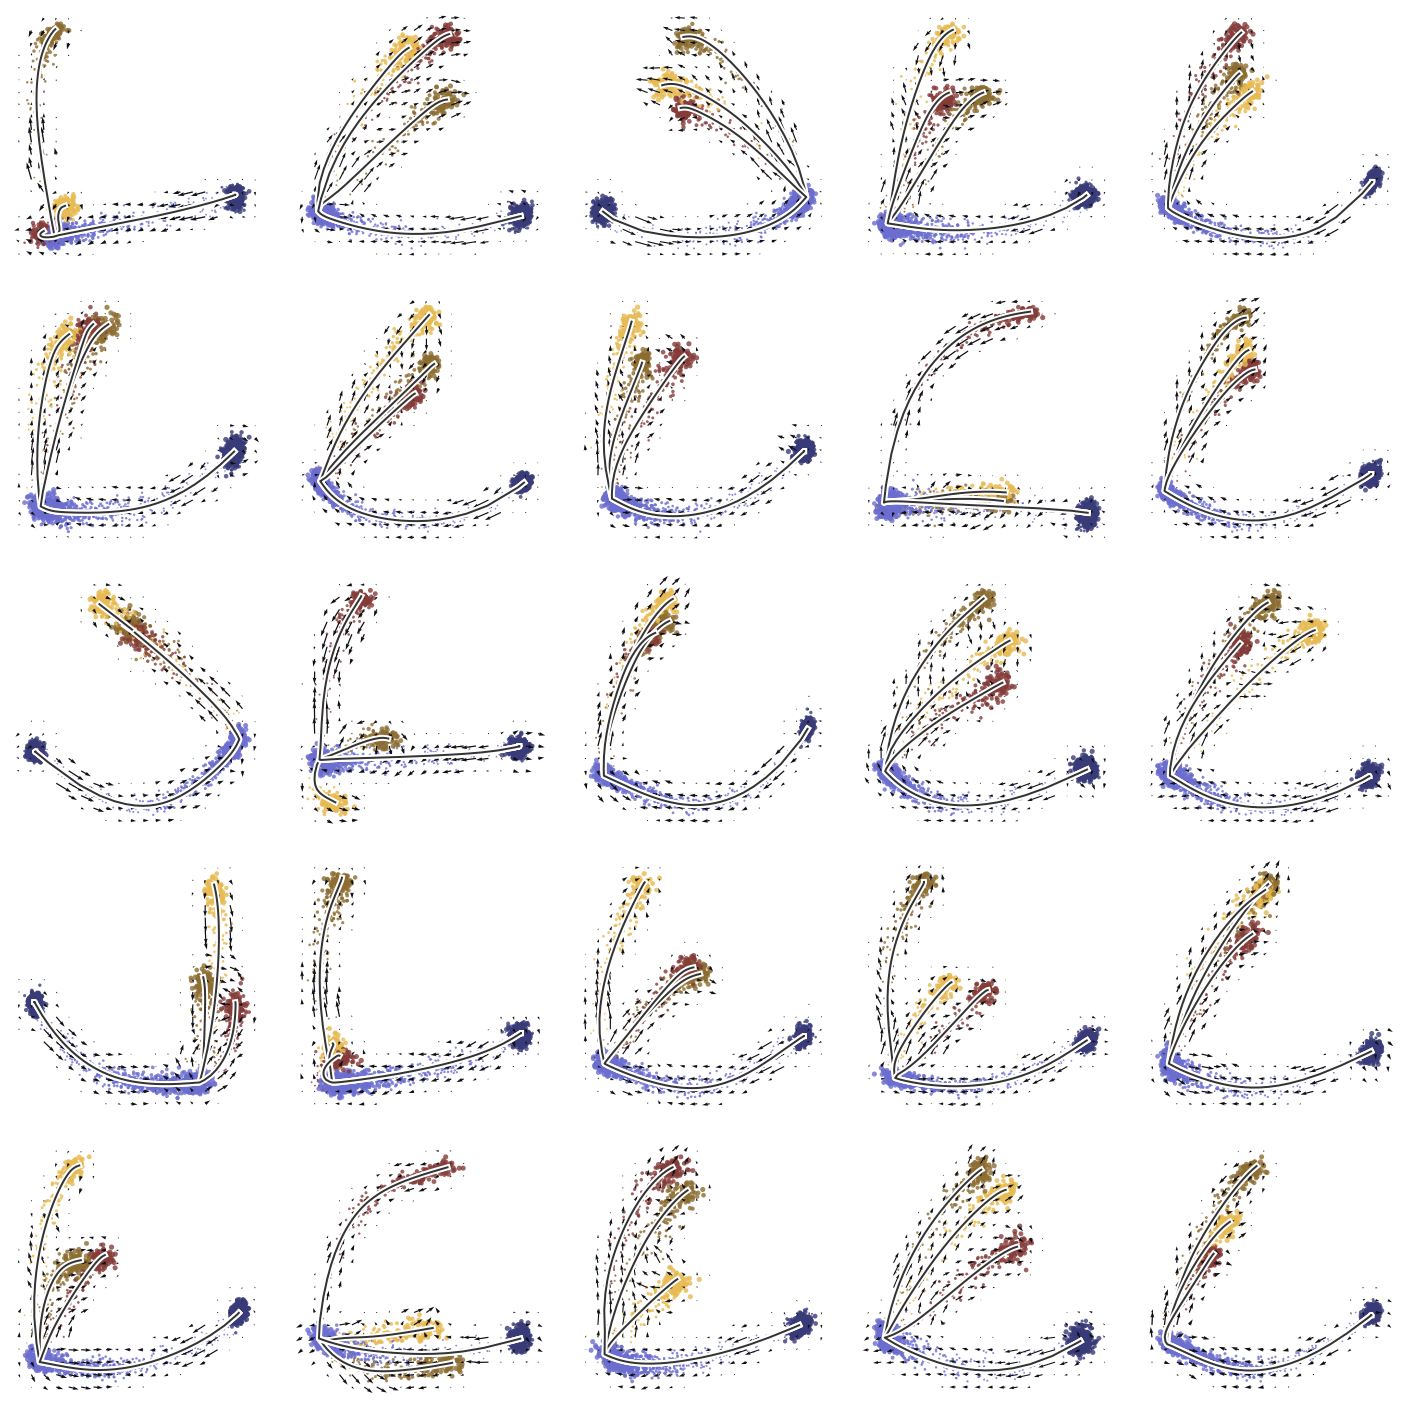

In [9]:
tviz_ = time.time()

from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence
rs = RandomState(MT19937(SeedSequence(2812)))


# szfig = [1,1]
N = np.prod(szfig)
fig1,ax1 = plt.subplots(szfig[0],szfig[1],figsize=[20,20])
for i_ in range(N):
    axl = np.unravel_index(i_,szfig)
    vlm = vcy.VelocytoLoom(loom_filepath=filename+str(i_)+'.loom')
    preprocess(vlm,filter=False,sim=True,meta=meta,sz_normalize=False)
    
    gridArrowPlots(vlm,Trans=["sqrt"],embed="PCA",sim=True,meta=meta,ax=ax1[axl],\
                   legend=False,plot_baseline=False,title=False,steps=(20,20),quiver_scale=25)
    ax1[axl].axis('off')    


fig1.tight_layout()
dtime = time.time()-tviz_
print('Processing and visualization runtime: {:.1f} seconds.'.format(dtime))


In [10]:
!mkdir -p figure
fig1.savefig('figure/big_compare.png',dpi=600)

In [11]:
t2 = time.time()

In [12]:
print('Runtime: {:.2f} seconds.'.format(t2-t1))

Runtime: 798.71 seconds.


In [13]:
!zip figures.zip figure/*

  adding: figure/big_compare.png (deflated 5%)


In [14]:
!zip data.zip data/simdata_abcde*.loom 

  adding: data/simdata_abcde0.loom (deflated 26%)
